In [1]:
import numpy as np 

In [63]:
# assuming binary classifcation 
y_pred= [0.7, 0.5, 0.3, 0.2, 0.6,0.8]
y_true = [1, 0, 1, 0, 1, 0]

#AUC is the area under curve between TPR(y-axis) and FPR (x-axis)


# varying thresholds from 0 to 1 , we plot the TPR and FPR 
threshold= 0 
TPR_ALL= []
FPR_ALL = []
while threshold<=1:
    # compute here 
    y_pred_binary = [1 if i>=threshold else 0 for i in y_pred ] 
    y_pred_binary= np.array(y_pred_binary)
    y_true= np.array(y_true)

    desc_score_indices = np.argsort(-y_pred_binary)
    y_true = y_true[desc_score_indices]
    y_pred_binary = y_pred_binary[desc_score_indices]
    
    TP = np.sum((y_pred_binary==y_true) & (y_pred_binary == 1))
    FP = np.sum((y_pred_binary!=y_true) & (y_pred_binary == 1))
    TN = np.sum((y_pred_binary==y_true) & (y_pred_binary == 0))
    FN = np.sum((y_pred_binary!=y_true) & (y_pred_binary == 0))
    N= np.sum(y_true==0)
    P = np.sum(y_true==1)
    TPR = TP/P
    FPR = FP/
    # compute area 
    TPR_ALL.append(TPR)
    FPR_ALL.append(FPR)
    threshold+=0.1 
print(TPR_ALL)
print(FPR_ALL)
np.trapz(TPR_ALL, FPR_ALL)

[1.0, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0]


-0.5

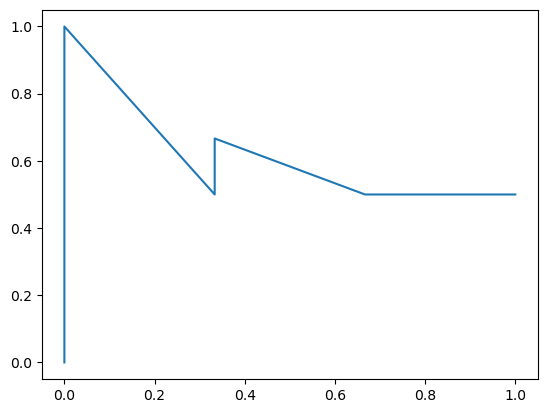

In [55]:
import matplotlib.pyplot as plt
plt.plot(FPR_ALL, TPR_ALL)
plt.show()

In [56]:
import numpy as np

def compute_auc(y_true, y_scores):
    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    # Sort scores and corresponding true values by descending score
    desc_score_indices = np.argsort(-y_scores)
    y_true = y_true[desc_score_indices]
    y_scores = y_scores[desc_score_indices]

    # Compute TPR and FPR at different thresholds
    TPR = []
    FPR = []
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)

    TP = 0
    FP = 0

    for i in range(len(y_true)):
        if y_true[i] == 1:
            TP += 1
        else:
            FP += 1
        TPR.append(TP / P)
        FPR.append(FP / N)

    TPR = np.array(TPR)
    FPR = np.array(FPR)
    print(f"TPR: {TPR}")
    print(f"FPR: {FPR}")

    # Use trapezoidal rule to calculate AUC
    auc = np.trapz(TPR, FPR)
    return auc

In [60]:
y_pred= [0.7, 0.5, 0.3, 0.2, 0.6,0.8]
y_true = [1, 0, 1, 0, 1, 0]

auc = compute_auc(y_true, y_pred)
print(f"AUC: {auc:.4f}")

TPR: [0.         0.33333333 0.66666667 0.66666667 1.         1.        ]
FPR: [0.33333333 0.33333333 0.33333333 0.66666667 0.66666667 1.        ]
AUC: 0.5556


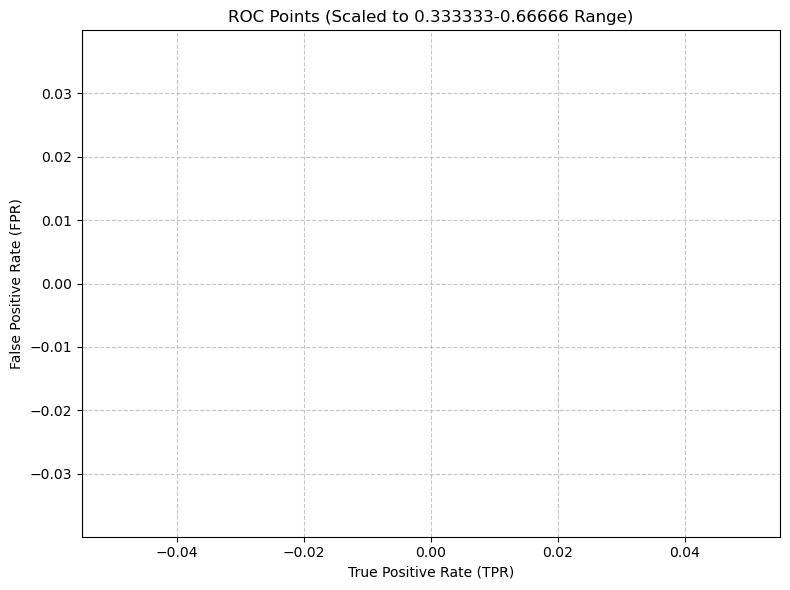

In [59]:
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Set the x and y axis limits to the specified range
# plt.xlim(0.333333, 0.66666)
# plt.ylim(0.333333, 0.66666)

# Add labels and title
plt.xlabel('True Positive Rate (TPR)')
plt.ylabel('False Positive Rate (FPR)')
plt.title('ROC Points (Scaled to 0.333333-0.66666 Range)')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add a diagonal reference line if needed
plt.plot(FPR, TPR, 'k--', alpha=0.5)

# Ensure the aspect ratio is equal
plt.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

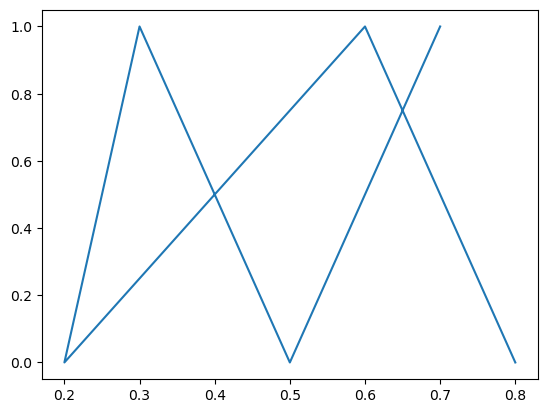

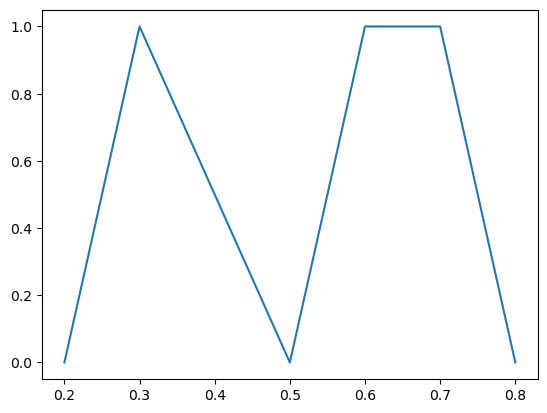

In [47]:
y_pred= np.array([0.7, 0.5, 0.3, 0.2, 0.6,0.8])
y_true = np.array([1, 0, 1, 0, 1, 0])

plt.plot(y_pred, y_true)
# Set the x and y axis limits to the specified range
# plt.xlim(0.333333, 0.66666)
# plt.ylim(0.333333, 0.66666)
plt.show()

# # Sort scores and corresponding true values by descending score
desc_score_indices = np.argsort(-y_pred)
y_true = y_true[desc_score_indices]
y_pred = y_pred[desc_score_indices]

plt.plot(y_pred, y_true)
plt.show()

In [64]:
import numpy as np

y_pred = [0.7, 0.5, 0.3, 0.2, 0.6, 0.8]
y_true = [1, 0, 1, 0, 1, 0]

TPR_ALL = []
FPR_ALL = []

threshold = 0
while threshold <= 1:
    y_pred_binary = np.array([1 if i >= threshold else 0 for i in y_pred])
    y_true_np = np.array(y_true)

    TP = np.sum((y_pred_binary == 1) & (y_true_np == 1))
    FP = np.sum((y_pred_binary == 1) & (y_true_np == 0))
    FN = np.sum((y_pred_binary == 0) & (y_true_np == 1))
    TN = np.sum((y_pred_binary == 0) & (y_true_np == 0))

    P = TP + FN
    N = FP + TN

    TPR = TP / P if P > 0 else 0
    FPR = FP / N if N > 0 else 0

    TPR_ALL.append(TPR)
    FPR_ALL.append(FPR)
    
    threshold += 0.1

print("TPR:", TPR_ALL)
print("FPR:", FPR_ALL)
auc_manual = np.trapz(TPR_ALL, FPR_ALL)
print(f"AUC (manual): {auc_manual:.4f}")


TPR: [1.0, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0]
FPR: [1.0, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0]
AUC (manual): -0.5000
